In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///DATA/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Measurement

In [10]:
# Display the row's columns and data in dictionary format from Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a192df1d0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [11]:
# Select all data
sel = [Measurement.id, Measurement.station, Measurement.prcp, Measurement.date, Measurement.tobs]
Measurement_DF = pd.DataFrame(session.query(*sel).all())
Measurement_DF.head(10)

,id,station,prcp,date,tobs
0,1,USC00519397,0.08,2010-01-01,65.0
1,2,USC00519397,0.00,2010-01-02,63.0
2,3,USC00519397,0.00,2010-01-03,74.0
3,4,USC00519397,0.00,2010-01-04,76.0
4,5,USC00519397,NaN,2010-01-06,73.0
5,6,USC00519397,0.06,2010-01-07,70.0
6,7,USC00519397,0.00,2010-01-08,64.0
7,8,USC00519397,0.00,2010-01-09,68.0
8,9,USC00519397,0.00,2010-01-10,73.0
9,10,USC00519397,0.01,2010-01-11,64.0


### Station

In [12]:
# Display the row's columns and data in dictionary format from Statio
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a19870210>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [13]:
# Select all data
sel = [Station.name, Station.latitude, Station.id, Station.elevation, Station.station, Station.longitude]
Station_DF = pd.DataFrame(session.query(*sel).all())
Station_DF

,name,latitude,id,elevation,station,longitude
0,"WAIKIKI 717.2, HI US",21.27160,1,3.0,USC00519397,-157.81680
1,"KANEOHE 838.1, HI US",21.42340,2,14.6,USC00513117,-157.80150
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,3,7.0,USC00514830,-157.83740
3,"PEARL CITY, HI US",21.39340,4,11.9,USC00517948,-157.97510
4,"UPPER WAHIAWA 874.3, HI US",21.49920,5,306.6,USC00518838,-158.01110
5,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,6,19.5,USC00519523,-157.71139
6,"WAIHEE 837.5, HI US",21.45167,7,32.9,USC00519281,-157.84889
7,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,8,0.9,USC00511918,-157.99920
8,"MANOA LYON ARBO 785.2, HI US",21.33310,9,152.4,USC00516128,-157.80250


### Precipitation

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Earliest Date
date1 = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date1[0]

'2017-08-23'

In [15]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
Prc_DF = pd.DataFrame(session.query(*sel).\
                      filter(Measurement.date > '2016-08-23').\
                      order_by(Measurement.date.asc()).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
Prc_DF = Prc_DF.set_index('date')
Prc_DF = Prc_DF.rename(columns={'prcp': 'precipitation'})
Prc_DF.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


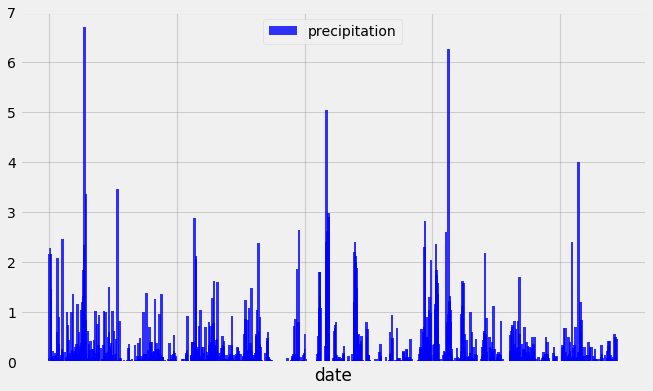

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

Time = np.arange(len(Prc_DF['precipitation']))
plt.figure(figsize = (10, 6))
plt.grid(True)
plt.axvline(x = 0, color = 'grey', linewidth = 1.2, alpha = .3)
plt.axvline(x = 500, color = 'grey', linewidth = 1.2, alpha = .3)
plt.axvline(x = 1000, color = 'grey', linewidth = 1.2, alpha = .3)
plt.axvline(x = 1500, color = 'grey', linewidth = 1.2, alpha = .3)
plt.axvline(x = 2000, color = 'grey', linewidth = 1.2, alpha = .3)
plt.axhline(y = 6.97, color = 'grey', linewidth = 1.2, alpha = .3)

p1 = plt.bar(Time, Prc_DF['precipitation'] , color = 'blue', alpha = 0.8, align = 'center', width = 10)
#plt.title('Precipitation')
plt.xlabel('date')
#plt.xticks(rotation = 90)
plt.xticks([])
plt.ylim(0, 7)
plt.legend(p1, ['precipitation'], loc = 9)

# Save the Figure
plt.savefig("precipitation.png", bbox_inches = 'tight')

# Show the Figure
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Results = Prc_DF.describe()
Results

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).\
    group_by(Measurement.station).\
    count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Stations_G = session.query(Measurement.station, func.count(Measurement.station)).\
                           group_by(Measurement.station).\
                           order_by(func.count(Measurement.station).desc())
for row in Stations_G:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
St_most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                               filter_by(station = 'USC00519281')
for row in St_most_active:
    print(row)

(54.0, 85.0, 71.66378066378067)


In [21]:
# Choose the station with the highest number of temperature observations.
Temp_most_active = pd.DataFrame(session.query(Measurement.tobs).\
                                              filter(Measurement.date > '2016-08-23').\
                                              filter_by(station = 'USC00519281'))
Temp_most_active.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


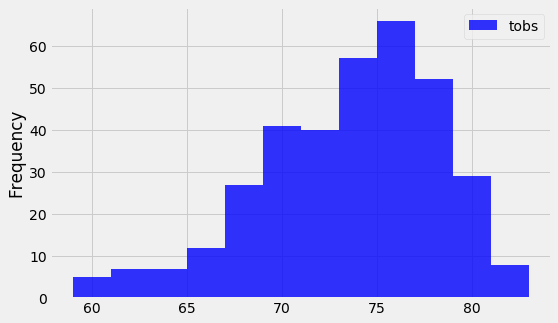

In [22]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize = (8, 5))

sns.distplot(Temp_most_active, hist = True, kde = False, 
             bins = 12, color = 'blue', hist_kws = {"alpha": 0.8},
             label = 'tobs')
plt.legend()
#plt.title('Temperature Histogram')
plt.ylabel('Frequency')
#plt.ylabel('Temperature')

# Save the Figure
plt.savefig("station-histogram.png", bbox_inches = 'tight')

# Show the Figure
plt.show()


In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
Temp_Trip = calc_temps('2017-08-20', '2017-08-23')
Temp_Trip

[(76.0, 79.85714285714286, 82.0)]

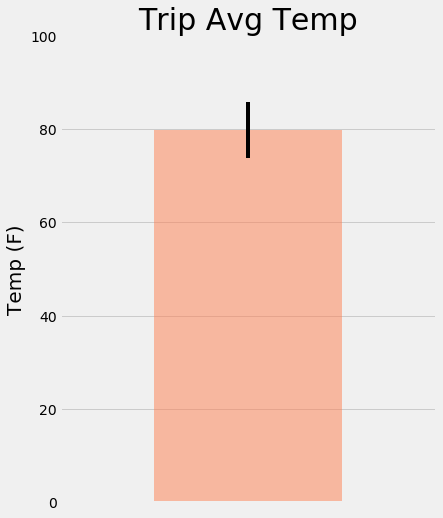

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
Temp_Trip = pd.DataFrame(Temp_Trip, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = Temp_Trip['Avg Temp']
min_max_temp = Temp_Trip.iloc[0]['Max Temp'] - Temp_Trip.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr = min_max_temp, figsize = (6,8), alpha = 0.5, color = 'coral')
plt.title("Trip Avg Temp", fontsize = 30)
plt.ylabel("Temp (F)", fontsize = 20)
plt.ylim(0, 100)
plt.xticks([])
plt.grid(True)
plt.savefig("Temperature.png")
plt.show()

In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Station.name, Measurement.prcp, Station.latitude, Station.longitude, 
       Station.elevation, Measurement.tobs]
start_date = '2017-08-20'
end_date = '2017-08-23'
Match_Data = session.query(*sel).filter(Measurement.station == Station.station).\
                           filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                           order_by(Measurement.prcp.desc()).all()
for row in Match_Data:
    print(row)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.56, 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.5, 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.45, 21.3331, -157.8025, 152.4, 76.0)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.08, 21.33556, -157.71139, 19.5, 82.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.02, 21.5213, -157.8374, 7.0, 79.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.01, 21.5213, -157.8374, 7.0, 80.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 21.2716, -157.8168, 3.0, 81.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 21.2716, -157.8168, 3.0, 81.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 21.2716, -157.8168, 3.0, 82.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 21.2716, -157.8168, 3.0, 81.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.0, 21.5213, -157.8374, 7.0, 82.0)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.0,

## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
start_date = '08-20'
end_date = '08-23'
normals = ['08-20', '08-21', '08-22', '08-23']

for row in normals:
    print(daily_normals(row))

[(68.0, 76.45283018867924, 82.0)]
[(67.0, 76.4, 83.0)]
[(69.0, 76.47169811320755, 84.0)]
[(67.0, 76.6923076923077, 87.0)]


In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
normals = []
start_date = '08-20'
end_date = '08-23'
days = ['08-20', '08-21', '08-22', '08-23']

# Loop through the list of %m-%d strings and calculate the normals for each date
for row in days:
    print(daily_normals(row))
    normals.append(['2018-' + row, 
                    daily_normals(row)[0][0], 
                    daily_normals(row)[0][1], 
                    daily_normals(row)[0][2], 
                   ])

[(68.0, 76.45283018867924, 82.0)]
[(67.0, 76.4, 83.0)]
[(69.0, 76.47169811320755, 84.0)]
[(67.0, 76.6923076923077, 87.0)]


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
NormalDays = pd.DataFrame(normals)
NormalDays = NormalDays.rename(columns={0: 'date', 1: 'tmin', 2: 'tavg', 3: 'tmax'})
NormalDays = NormalDays.set_index('date')
NormalDays

,tmin,tavg,tmax
date,,,
2018-08-20,68.0,76.452830,82.0
2018-08-21,67.0,76.400000,83.0
2018-08-22,69.0,76.471698,84.0
2018-08-23,67.0,76.692308,87.0


<Figure size 864x576 with 0 Axes>

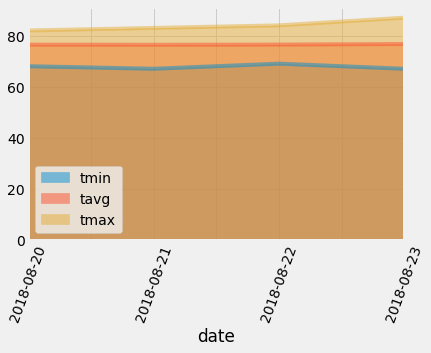

In [31]:
# Plot the daily normals as an area plot with `stacked=False`
plt.figure(figsize = (12, 8))
NormalDays.plot.area(stacked = False, alpha = 0.5)
plt.xticks(rotation = 70)

# Save the Figure
plt.savefig("daily-normals.png", bbox_inches = 'tight')

# Show the Figure
plt.show()